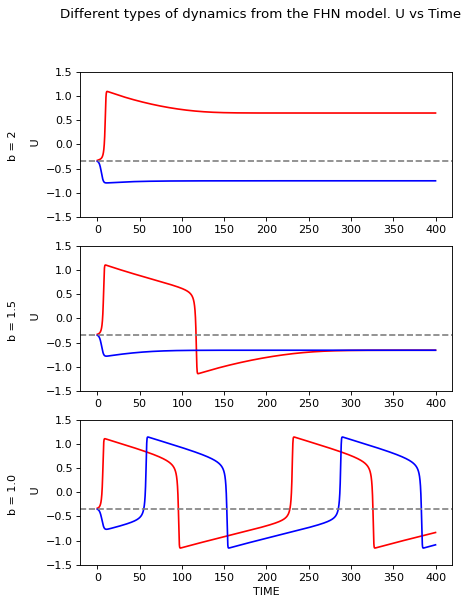

In [1]:
from modelling import fhn_modelling
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1
time = 400
list_B = [2, 1.5, 1.0]
t = np.arange(0, time, dt)


plt.figure(figsize=(6, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle('Different types of dynamics from the FHN model. U vs Time')

for i in range(len(list_B)):
    plt.subplot(3, 1, i+1)
    mat_U1, _ = fhn_modelling(u_init=-0.33, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    mat_U2, _ = fhn_modelling(u_init=-0.35, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    plt.plot(t, mat_U1, c="red")
    plt.plot(t, mat_U2, c="blue")
    plt.ylabel(f"b = {list_B[i]} \n\n U")
    plt.ylim([-1.5, 1.5])
    plt.axhline(y = -0.34, color = 'grey', linestyle = 'dashed', label = "treshold")
plt.xlabel('TIME')
plt.show()



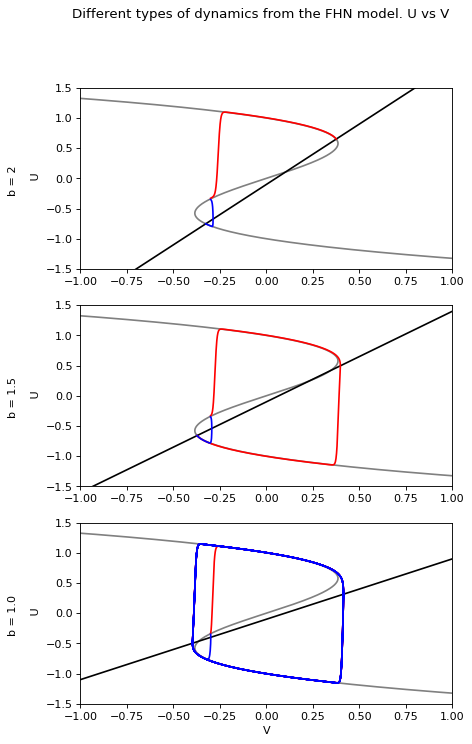

In [2]:
from modelling import fhn_modelling, u_nullcline, v_nullcline
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1
time = 1000
list_B = [2, 1.5, 1.0]
t = np.arange(0, time, dt)

plt.figure(figsize=(6, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle('Different types of dynamics from the FHN model. U vs V')

vs = np.linspace(-1,1,1000)
us = np.linspace(-1.5, 1.5, 1000)
for i in range(len(list_B)):
    plt.subplot(3, 1, i+1)
    mat_U1, mat_V1 = fhn_modelling(u_init=-0.33, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    mat_U2, mat_V2 = fhn_modelling(u_init=-0.35, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    plt.plot(u_nullcline(us), us, c='grey') # changer mat_U1 en autre chose...
    plt.plot(vs, v_nullcline(vs, list_B[i]), c='black')
    plt.plot(mat_V1, mat_U1, c="red")
    plt.plot(mat_V2, mat_U2, c="blue")
    plt.ylabel(f"b = {list_B[i]} \n\n U")
    plt.ylim([-1.5, 1.5])
    plt.xlim([-1, 1])
plt.xlabel('V')
plt.show()

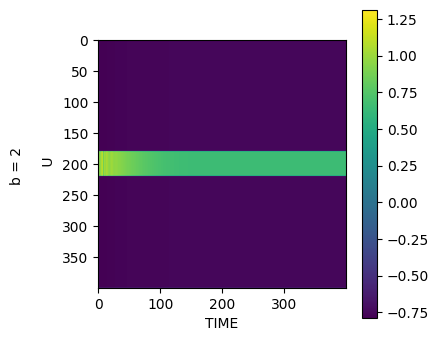

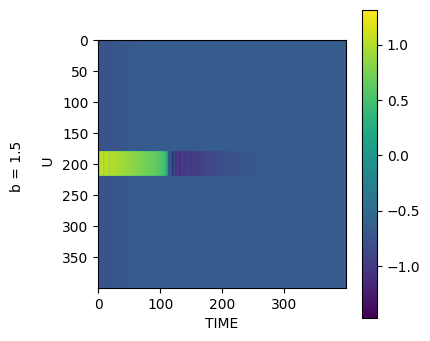

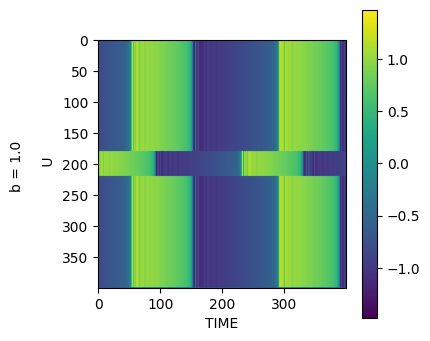

In [3]:
from modelling import fhn_space
import matplotlib.pyplot as plt

time = 400
width = 400
dt = 1
u_init = -0.6
v_init = -0.3
list_B = [2, 1.5, 1.0]

for i in range(len(list_B)):
    fig, ax = plt.subplots(figsize=(4, 4))
    mat_U = fhn_space(u_init=u_init, v_init=v_init, B=list_B[i], dt=dt, time=time, width=width)
    im = ax.imshow(mat_U)
    plt.colorbar(im)
    plt.ylabel(f"b = {list_B[i]} \n\n U")
    plt.xlabel('TIME')
    plt.show()

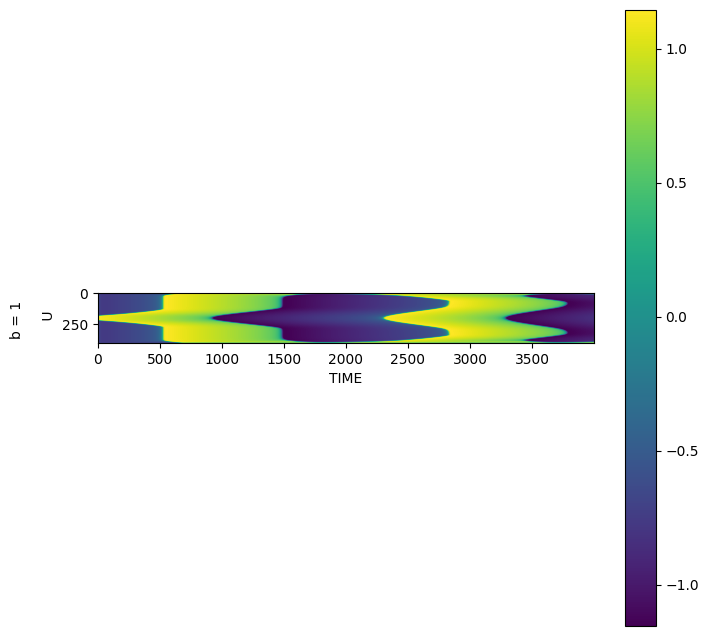

In [7]:
import matplotlib.pyplot as plt
from modelling import fhn_space_diffusion

# Parameters
width = 400 # Number of position
time = 4000 # Number oft timepoints
A = 0.1
E = 0.01

dx = 1
dt = 0.1
D = 1
B = 1

fig, ax = plt.subplots(figsize=(8, 8))
mat_U = fhn_space_diffusion(B=B, dt=dt, dx=dx, time=time, width=width)
im = ax.imshow(mat_U)
plt.colorbar(im)
plt.ylabel(f"b = {B} \n\n U")
plt.xlabel('TIME')
plt.show()